In [9]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    tf.config.experimental.set_memory_growth(gpus[0], True)
    print("GPU ok")
else:
    print("GPU not ok, CPU")

GPU ok


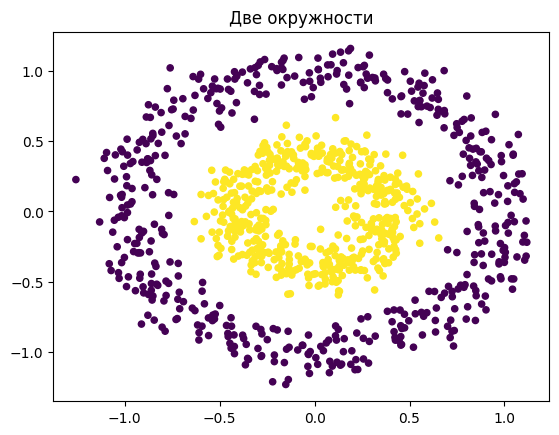

In [10]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(
    n_samples=1000,
    factor=0.4,
    noise=0.1,
    random_state=42
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=20)
plt.title("Две окружности")
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(4, activation="relu", input_shape=(2,)),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 12        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=1000,
)


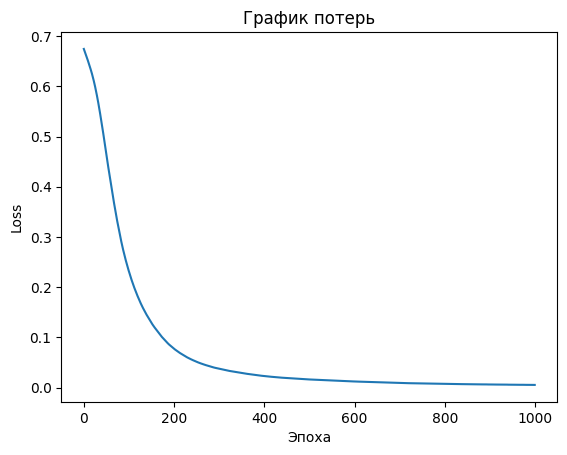

In [14]:
plt.plot(history.history["loss"])
plt.title("График потерь")
plt.xlabel("Эпоха")
plt.ylabel("Loss")
plt.show()


In [15]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Точность на тесте: {acc:.3f}")


Точность на тесте: 0.990


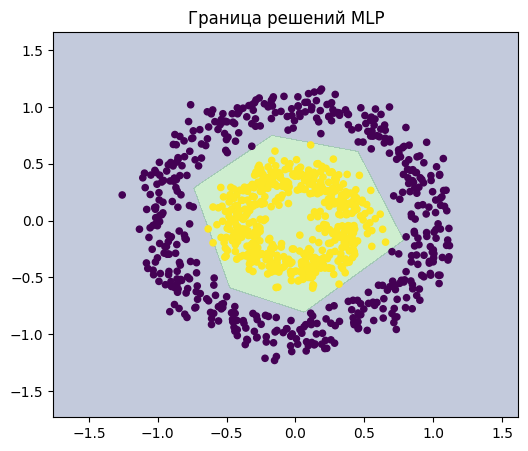

In [16]:
import numpy as np

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 300),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid, verbose=0).reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20)
plt.title("Граница решений MLP")
plt.show()
